Download the dataset from the following link:

https://drive.google.com/open?id=0B4c_CWtMboiGRHJhWWZMbGpQazFxcHNfUkhnQ1pQU09IeXFR

If you read the dataset by importing pandas library and using pd.read_csv():

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Remove the first column 'id' and the last column 'Unnamed:32' from this dataset:

In [4]:
data.drop(labels=[data.columns[0],data.columns[32]],axis=1,inplace=True)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The task is to determine the best fitting probability distribution on each column data (Sample Data of the Random Variable) of the dataset, out of the possible choices of probability distributions: Normal(Symmetric), Rayleigh(Skewed) or Binomial. 

So, let's see that how are we going to do that for a single column data and then we have to repeat this process for rest of the columns: 

Step 1: First, we will check whether the Random Variable is Discrete or Continous by checking that how many unique values are there in the single column of the Random Variable and does the Random Variable has string or floating point or integer values? Usually, Discrete Random Variables have either Integer or String values whereas continous random variables have floating point values and also because the values are not sparse (0s or 1s) in continous random variables and they are dense (floating point values) so values don't repeat much and hence the number of unique values are almost equal to the total number of values in the column. As an example, lets take one by one two columns: 'diagnosis' and 'radius_mean': 

In [6]:
diagnosis_unique_values = data['diagnosis'].unique()

In [7]:
radius_mean_unique_values = data['radius_mean'].unique()

In [8]:
diagnosis_unique_values

array(['M', 'B'], dtype=object)

In [9]:
radius_mean_unique_values

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

Let's see that in each of the cases, how many unique values are there:

In [10]:
len(diagnosis_unique_values)

2

In [11]:
len(radius_mean_unique_values)

456

As you can see that in our discrete random variable of 'diagnosis', we have very limited values, only two in number and they are string in nature : ['B, 'M']

Whereas, in our continous random variable of 'radius_mean', we can see the numbe rof unique values is huge and it's 456 which is not much smaller than 569, the number of rows in a column. Moreover, the nature or datatype of values is floating point. 

So, lets write this concept in the form of the code: 

In [12]:
def determine_random_variable_type(column_name):
    
    if (type(data[column_name].iloc[0]) == str or type(data[column_name].iloc[0]) == int) and (len(data[column_name].unique()) < len(data[column_name])):
        
        return 'discrete'
    
    else:
        
        return 'continous'

The above function will take the name of the single column of the dataset and access the data of that column from the dataset and check the datatype or nature of the values inside that column and also the total number of unique values in that column and check the conditions for the random variable or that specific column being discrete or continous and returns the the type of random variable as strings 'discrete' or 'continous'. 

Now, the next task is to calculate the value of the best estimator of the population parameter of the probability distribution from which a specific column data is being sampled. In case of discrete random variables, it's pretty easy to determine that: If there are only two unique values in the column data, then it's binomial distribution and multinomial if there are more than two unique values. 

But, the real challenge lies in case of continous random variables, where it is difficult to determine that from which continous probability distibution the column data is being sampled. We have two options here: Either Normal (Symmetric) or Rayleigh (Skewed). So, in this case we have to find the best fit of our data on both the distributions and then select the distribution with the BESTEST FIT. 

Well, now the question arrises that how we are going to do that. We know that the Log Likelihood Function Value calculated on the data determines the quality of fit of data on the presumed distribution and if we maximize that value then we get the best fit of a specific probability distribution on the data. so, we first find the best fit of normal distibution on our continous data and then we find the best fit of Rayleigh Distribution on our continous data by maximizing the Log Likelihood Function Value for both the cases and because we have to select that distribution which gives us the bestest fit so we will end up selecting the distribution whose Log Likelihood Function value is maximum among both maxmized Log Likelihood Function Values. 

The problem is that in order to find the Log Likelihood Function value evaluated in case of fit of specific distribution on the data, we need the PDF of that distribution, which we know but we dont know the values of best estimators of population parameters:
\begin{equation}
\mu, \sigma
\end{equation}
of Normal Distribution and best estimator of population parameter, 
\begin{equation}
\sigma (mode)
\end{equation}

of Rayleigh Distribution. 

Now, how do we get the values of the best estimators of population parameters of respective distributions. Well, we know the answer to this question and that is by Maximum Log Likelihood Estimation. We know that the data in each column of this dataset is IID (Independent and Identically Distributed) therefore, for any random column of this dataset, X where X can be 'radius_mean' or 'testure_mean' or anything else, the Log Likelihood function is evaluated as: 

\begin{equation}
\log_e L(\mu,\sigma) = \log_e P(X=x_1\cap X=x_2\cap .........X=x_N)
\end{equation}
For Normal Distribution

\begin{equation}
\log_e L(\mu, \sigma) = \log_e\prod\limits_{i=0}^{N}\left(\frac{1}{\sqrt{2\pi}\sigma}e^\frac{(x_i-\mu)^2}{2\sigma^2}\right)
\end{equation}

\begin{equation}
\log_e L(\mu, \sigma) = \sum\limits_{i=0}^{N}\log_e\left(\frac{1}{\sqrt{2\pi}\sigma}e^\frac{(x_i-\mu)^2}{2\sigma^2}\right)
\end{equation}
Here, the population mean and population standard deviation estimator best estimate for normal distribution can be evaluated by taking the derivative of the above function with respect to $\mu$ and $\sigma$ and when we do that, that is:
\begin{equation}
\frac{\partial\log_e L(\mu, \sigma)}{\partial\mu} = 0
\end{equation}

\begin{equation}
\frac{\partial log_e L(\mu, \sigma)}{\partial\sigma} = 0
\end{equation}

We get,
\begin{equation}
\mu_\text{best,normal} = \frac{\sum\limits_{i=0}^{N}{X_i}}{N}
\end{equation}

And, 

\begin{equation}
\sigma_\text{best,normal} = \sqrt{\frac{\sum\limits_{i=0}^{N}{(x_i-\mu_\text{best,normal})^2}}{N}}
\end{equation}

Which is sample mean and sample standard deviation, therefore these are the best estimates of the population parameters of Normal Distribution for the best fit on our column data. 

Similarly, we can find the values of the best estimators of the population parameter of Rayliegh Distribution by following the above mentioned steps, and we get the following value for the best estimate in case of Rayleigh Distribution:

\begin{equation}
\sigma_\text{best,rayleigh} = \sqrt{\frac{\sum\limits_{i=0}^{N}{x_i^2}}{2N}}
\end{equation}

So, these best estimates of the MVU Estimators of respective population parameters of respective Probability Distributions will maximize the Log Likelihood Function values for respective probability distributions and hence will result in best fit of respective distributions. Now, to determine the bestest fit among both of the distributions, we have to select that distribution for which the Log Likelihood Function is the highest among both already maximized values. 

Now, in our case N = 569, so the best estimates of the MVU estimators of the population parameters of respective probability distributions are given by:

\begin{equation}
\mu_\text{best,normal} = \frac{\sum\limits_{i=0}^{569}{x_i}}{569}
\end{equation}

And, 

\begin{equation}
\sigma_\text{best,normal} = \sqrt{\frac{\sum\limits_{i=0}^{569}{(x_i-\mu_\text{best,normal})^2}}{569}}
\end{equation}

For Normal Distribution

And, 

\begin{equation}
\sigma_\text{best,rayleigh} = \sqrt{\frac{\sum\limits_{i=0}^{569}{x_i^2}}{2*569}}
\end{equation}


Therefore, the maximized values of Log Likelihood Function for the case of both the probability distributions is given by:

\begin{equation}
L_\text{max,normal} = \log_e L(\mu_\text{best,normal},\sigma_\text{best,normal})
\end{equation}

\begin{equation}
L_\text{max,normal} = \sum\limits_{i=0}^{569}\log_e\left(\frac{1}{\sqrt{2\pi}\sigma_\text{best,normal}}e^\frac{(x_i-\mu_\text{best,normal})^2}{2\sigma_\text{best,normal}^2}\right)
\end{equation}

For Normal Distribution

And,

Similarly, maximized value of Log Likelihood Function for Rayleigh Distribution can be calculated as we have just calculated for Normal Distribution. 
\begin{equation}
L_\text{max,rayleigh} = \log_e L(\sigma_\text{best,rayleigh})
\end{equation}

Now, the column data will be considered to be sampled from Normal Distribution if:

\begin{equation}
L_\text{max,normal} > L_\text{max,rayleigh}
\end{equation}

else:

column data will be considered to be sampled from Rayleigh Distribution.

Therefore, in order to do all that, we are going to create following set of functions:

In [13]:
import numpy as np

import scipy.stats as s

In [14]:
def calculate_L_max_normal(column_name):
    
    mu_best_normal = data[column_name].mean()
    
    sigma_best_normal = data[column_name].std()
    
    L_max_normal = np.sum(s.norm.logpdf(data[column_name],loc=mu_best_normal,scale=sigma_best_normal))
    
    return L_max_normal

In [15]:
def calculate_L_max_rayleigh(column_name):
    
    sigma_best_rayleigh = np.sqrt(np.mean(data[column_name].apply(lambda x: x**2))/2)
    
    L_max_rayleigh = np.sum(s.rayleigh.logpdf(data[column_name],scale=sigma_best_rayleigh))
    
    return L_max_rayleigh

In [16]:
def determine_distribution_type(column_name):
    
    column_type = determine_random_variable_type(column_name)
    
    if column_type == 'discrete':
        
        if len(data[column_name].unique()) == 2:
            
            return 'binomial'
        
        else:
            
            return 'multinomial'
        
    else:
        
        L_max_normal = calculate_L_max_normal(column_name) 
        
        L_max_rayleigh = calculate_L_max_rayleigh(column_name) 
        
        if L_max_normal > L_max_rayleigh:
            
            return 'normal'
        
        else:
            
            return 'rayleigh'

In [17]:
Distributions = {}

for single_column in data.columns:
    
    Distributions[single_column] = determine_distribution_type(single_column)

In [18]:
Distributions

{'diagnosis': 'binomial',
 'radius_mean': 'normal',
 'texture_mean': 'normal',
 'perimeter_mean': 'normal',
 'area_mean': 'rayleigh',
 'smoothness_mean': 'normal',
 'compactness_mean': 'rayleigh',
 'concavity_mean': 'normal',
 'concave points_mean': 'normal',
 'symmetry_mean': 'normal',
 'fractal_dimension_mean': 'normal',
 'radius_se': 'rayleigh',
 'texture_se': 'rayleigh',
 'perimeter_se': 'rayleigh',
 'area_se': 'rayleigh',
 'smoothness_se': 'rayleigh',
 'compactness_se': 'rayleigh',
 'concavity_se': 'normal',
 'concave points_se': 'normal',
 'symmetry_se': 'normal',
 'fractal_dimension_se': 'rayleigh',
 'radius_worst': 'normal',
 'texture_worst': 'normal',
 'perimeter_worst': 'normal',
 'area_worst': 'rayleigh',
 'smoothness_worst': 'normal',
 'compactness_worst': 'rayleigh',
 'concavity_worst': 'normal',
 'concave points_worst': 'normal',
 'symmetry_worst': 'normal',
 'fractal_dimension_worst': 'normal'}

In [19]:
import matplotlib.pyplot as plt

In [20]:
columns_names_array = np.array(list(Distributions.keys()))

columns_names_array = columns_names_array[1:]

columns_names_array = columns_names_array.reshape(6,5)

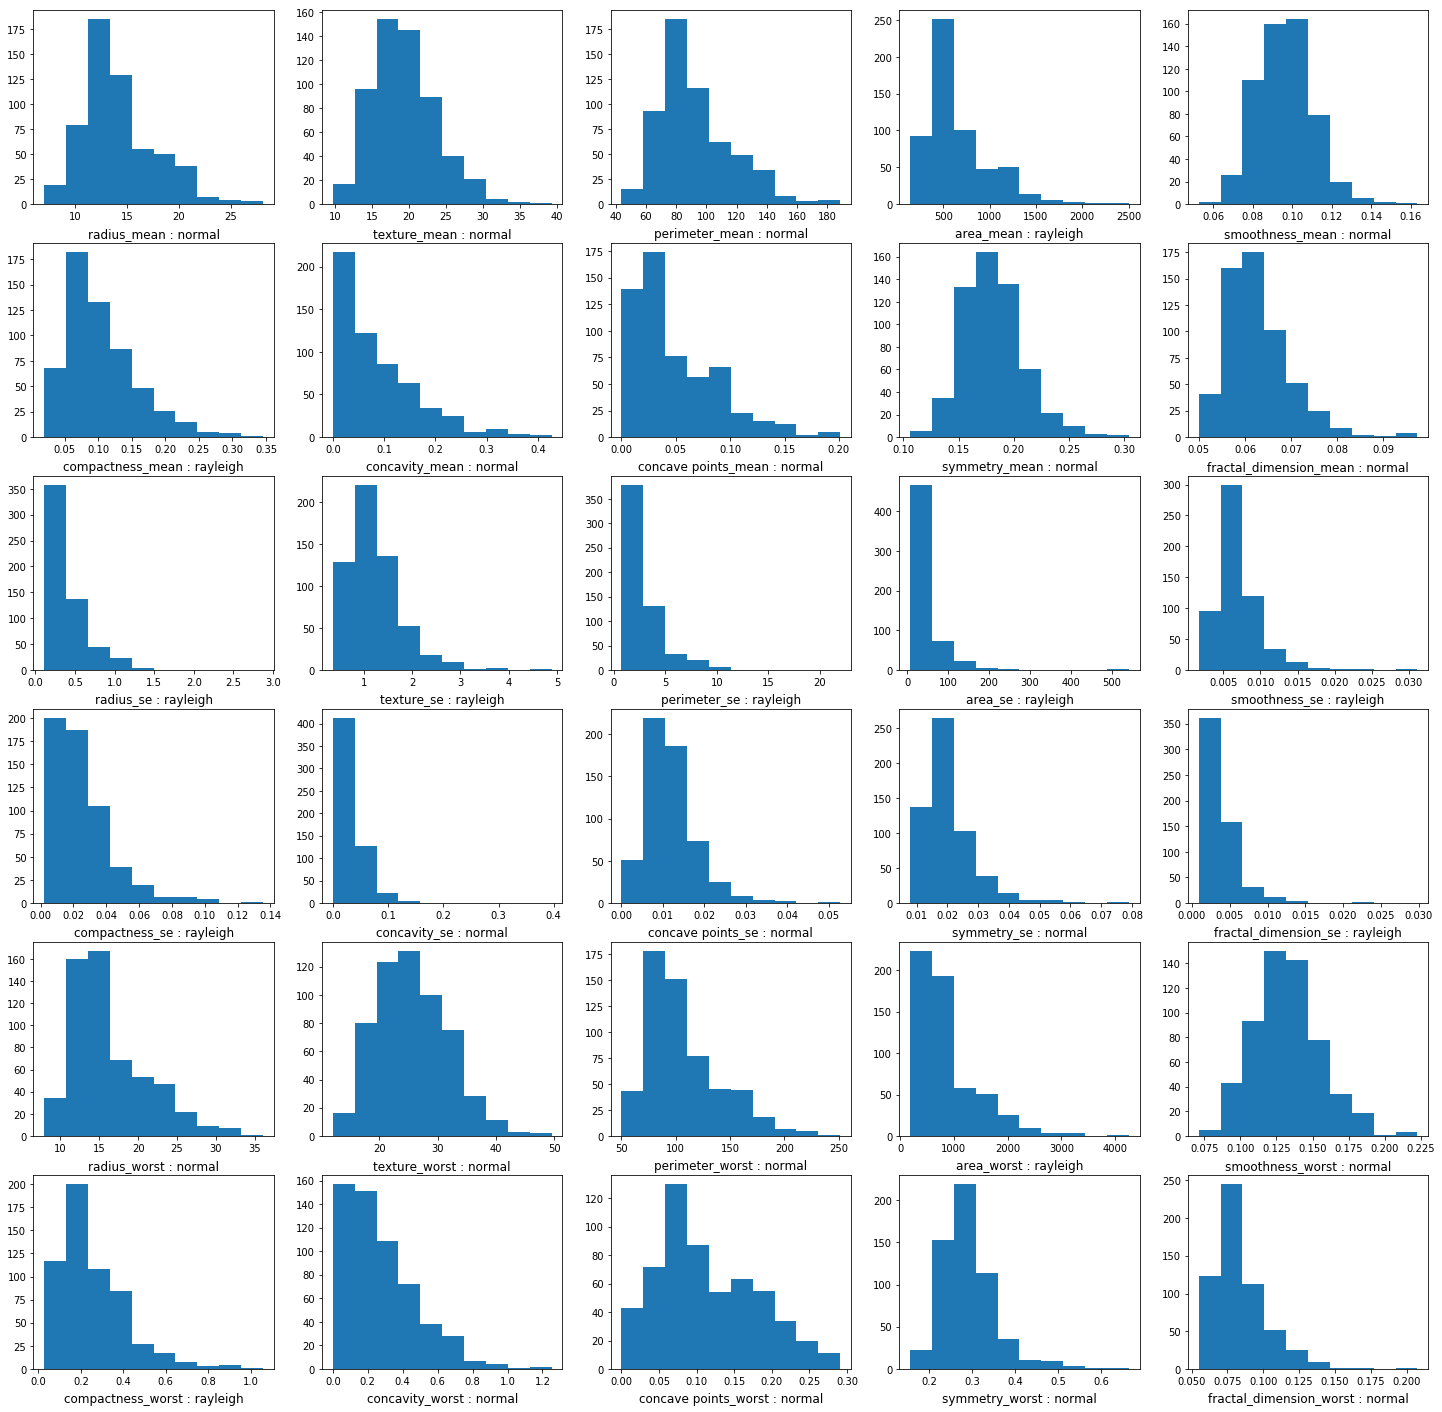

In [21]:
fig,axes = plt.subplots(6,5,figsize=(25,25))

for i in range(0,6):
    
    for j in range(0,5):
        
        axes[i,j].hist(data[columns_names_array[i,j]])
        
        axes[i,j].set_title(columns_names_array[i,j]+" : "+Distributions[columns_names_array[i,j]],y=-0.2)